In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [2]:
fma =pd.read_csv("fma-rock-vs-hiphop.csv")

In [3]:
fma.head(2)

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,135,256000,1,NaN,2008-11-26 01:43:26,2008-11-26 00:00:00,837,0,Rock,"[45, 58]",...,NaN,2484,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,NaN,0,NaN,[],Father's Day
1,136,256000,1,NaN,2008-11-26 01:43:35,2008-11-26 00:00:00,509,0,Rock,"[45, 58]",...,NaN,1948,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,NaN,0,NaN,[],Peel Back The Mountain Sky


In [4]:
echo =pd.read_json("echonest-metrics.json")

In [5]:
echo.head(2)

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240


In [6]:
df = echo.merge(fma[['track_id','genre_top']],on='track_id')

In [7]:
df.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,Hip-Hop
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,Hip-Hop
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,Hip-Hop
3,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,Hip-Hop
4,153,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018,Rock


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4801
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          4802 non-null   int64  
 1   acousticness      4802 non-null   float64
 2   danceability      4802 non-null   float64
 3   energy            4802 non-null   float64
 4   instrumentalness  4802 non-null   float64
 5   liveness          4802 non-null   float64
 6   speechiness       4802 non-null   float64
 7   tempo             4802 non-null   float64
 8   valence           4802 non-null   float64
 9   genre_top         4802 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 412.7+ KB


In [9]:
df.shape

(4802, 10)

In [10]:
df.isnull().sum()

track_id            0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
speechiness         0
tempo               0
valence             0
genre_top           0
dtype: int64

In [11]:
df.describe()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
count,4802.000000,4.802000e+03,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000
mean,30164.871720,4.870600e-01,0.436556,0.625126,0.604096,0.187997,0.104877,126.687944,0.453413
std,28592.013796,3.681396e-01,0.183502,0.244051,0.376487,0.150562,0.145934,34.002473,0.266632
min,2.000000,9.491000e-07,0.051307,0.000279,0.000000,0.025297,0.023234,29.093000,0.014392
25%,7494.250000,8.351236e-02,0.296047,0.450757,0.164972,0.104052,0.036897,98.000750,0.224617
50%,20723.500000,5.156888e-01,0.419447,0.648374,0.808752,0.123080,0.049594,124.625500,0.446240
75%,44240.750000,8.555765e-01,0.565339,0.837016,0.915472,0.215151,0.088290,151.450000,0.666914
max,124722.000000,9.957965e-01,0.961871,0.999768,0.993134,0.971392,0.966177,250.059000,0.983649


# Pairwise relationship

In [12]:
df.corr()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
track_id,1.000000,-0.372282,0.049454,0.140703,-0.275623,0.048231,-0.026995,-0.025392,0.010070
acousticness,-0.372282,1.000000,-0.028954,-0.281619,0.194780,-0.019991,0.072204,-0.026310,-0.013841
danceability,0.049454,-0.028954,1.000000,-0.242032,-0.255217,-0.106584,0.276206,-0.242089,0.473165
energy,0.140703,-0.281619,-0.242032,1.000000,0.028238,0.113331,-0.109983,0.195227,0.038603
instrumentalness,-0.275623,0.194780,-0.255217,0.028238,1.000000,-0.091022,-0.366762,0.022215,-0.219967
liveness,0.048231,-0.019991,-0.106584,0.113331,-0.091022,1.000000,0.041173,0.002732,-0.045093
speechiness,-0.026995,0.072204,0.276206,-0.109983,-0.366762,0.041173,1.000000,0.008241,0.149894
tempo,-0.025392,-0.026310,-0.242089,0.195227,0.022215,0.002732,0.008241,1.000000,0.052221
valence,0.010070,-0.013841,0.473165,0.038603,-0.219967,-0.045093,0.149894,0.052221,1.000000


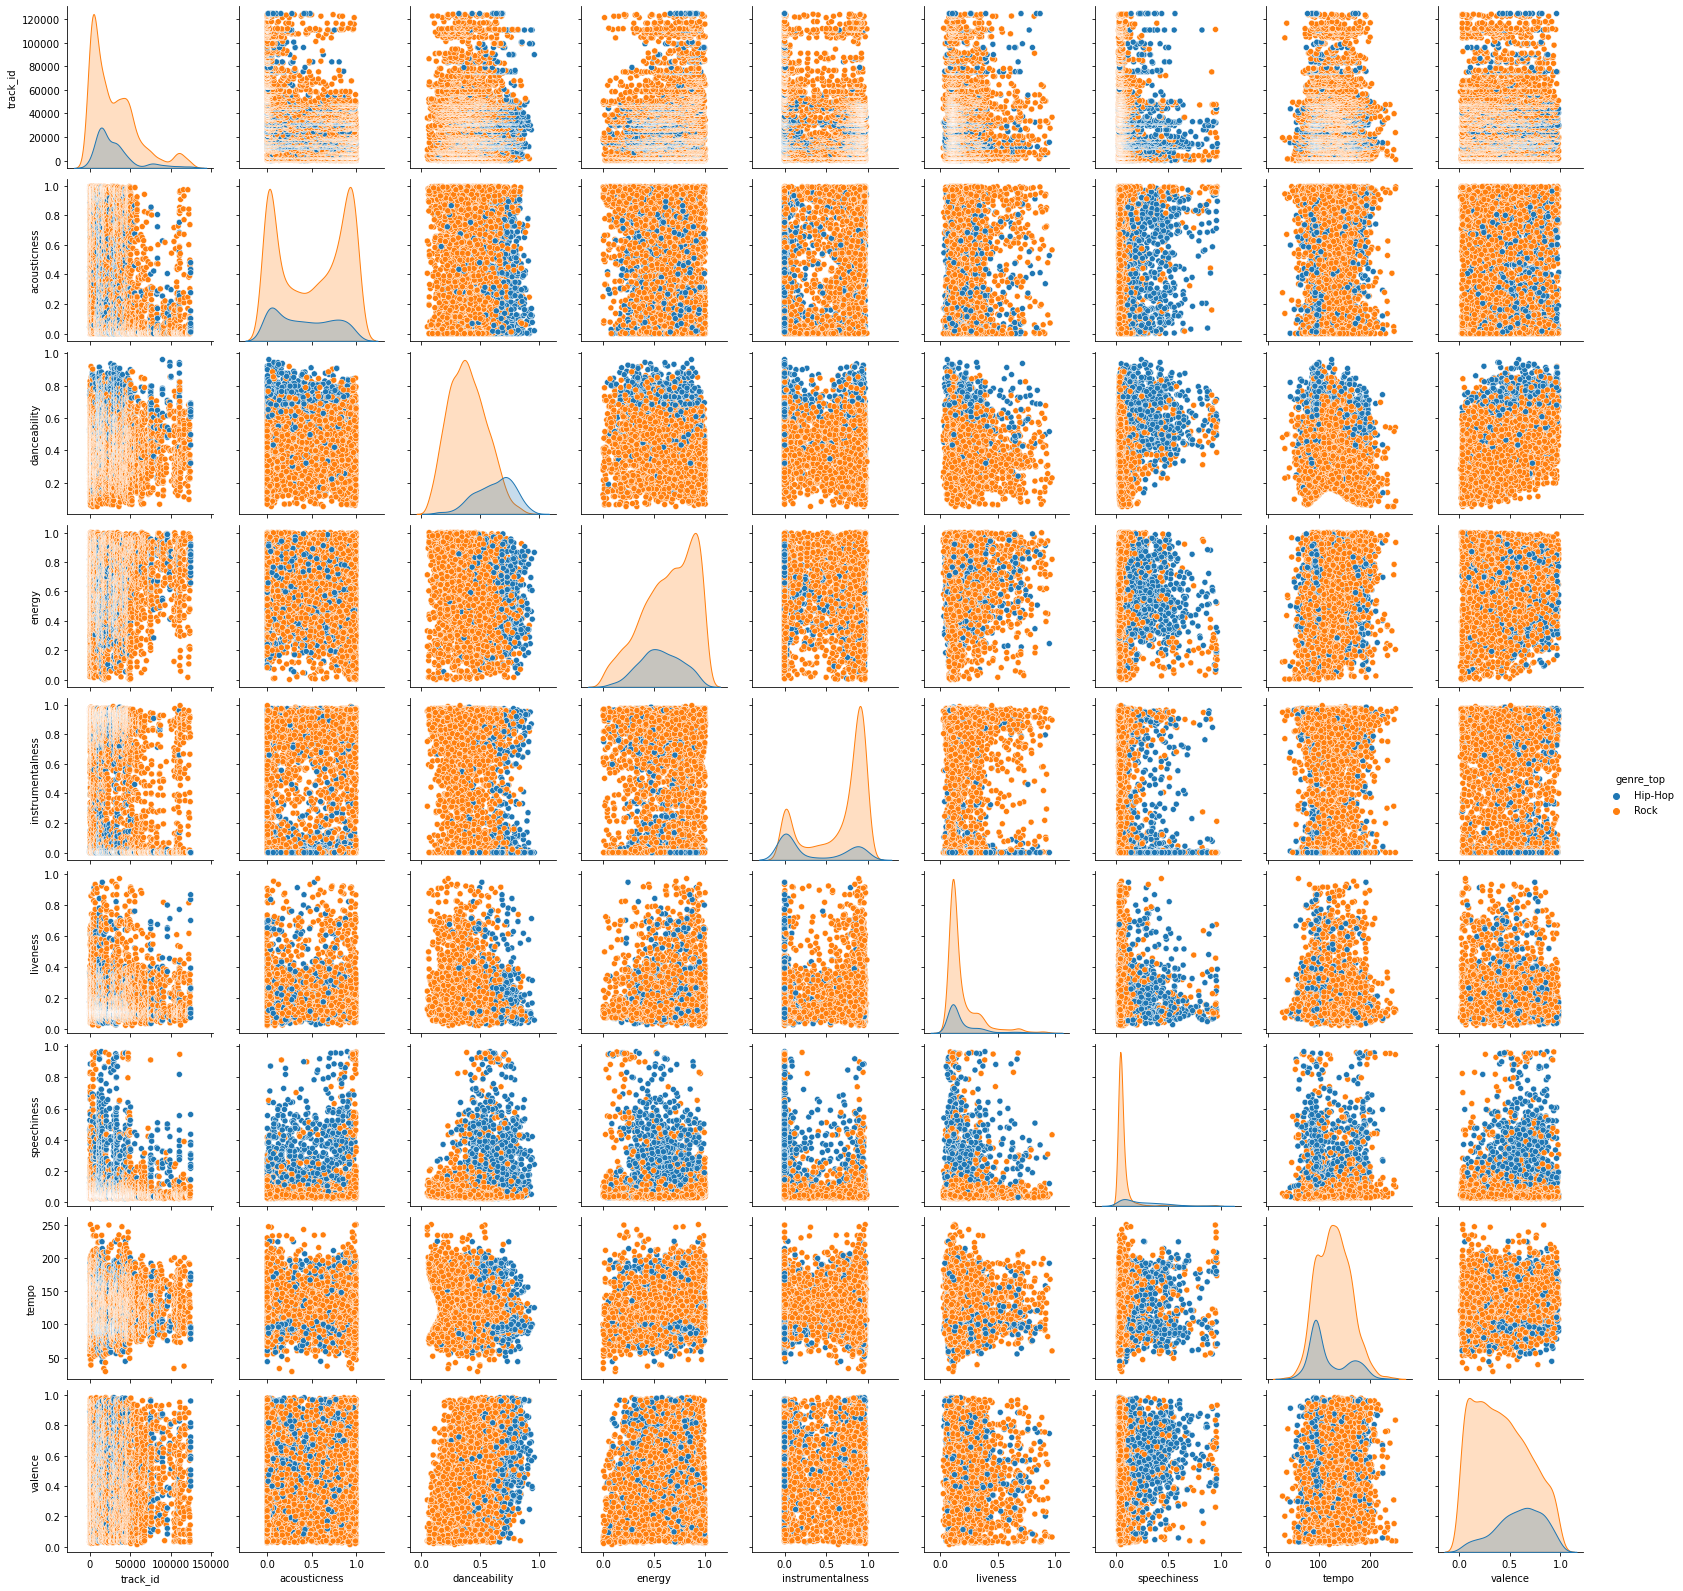

In [13]:
sns.pairplot(df,hue='genre_top')

In [22]:
X=df.drop('genre_top',axis=1) #features
X.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
3,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072
4,153,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018


In [23]:
y=df['genre_top'] #labels
y.head(4)

0    Hip-Hop
1    Hip-Hop
2    Hip-Hop
3    Hip-Hop
Name: genre_top, dtype: object

In [101]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [85]:
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [102]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# PCA 
used for the dimensionality reduction in machine learning.
It is a statistical process that converts the observations of correlated features into a set of linearly uncorrelated features with the help of diagonal transformation.

In [103]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [104]:
pca.explained_variance_


array([1.94208297, 1.66861816])

In [105]:
pca.explained_variance_ratio_

array([0.21573082, 0.18535375])

# DecisionTree classifier
Confusion matrix, Compute precision, recall, F-measure and support

In [106]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
dtclassifier = DecisionTreeClassifier()
dtclassifier.fit(X_train, y_train)
y_pred = dtclassifier.predict(X_test) #predict test results

In [107]:
#from sklearn.metrics import accuracy_score
print(accuracy_score(y_test , y_pred))

0.8293444328824141


In [108]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[103  85]
 [ 79 694]]


In [109]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Hip-Hop       0.57      0.55      0.56       188
        Rock       0.89      0.90      0.89       773

    accuracy                           0.83       961
   macro avg       0.73      0.72      0.73       961
weighted avg       0.83      0.83      0.83       961



In [93]:
#pca = PCA(n_components=1)
#X_train = pca.fit_transform(X_train)
#X_test = pca.transform(X_test)

In [94]:
#dtclassifier = DecisionTreeClassifier()
#dtclassifier.fit(X_train, y_train)
#y_pred = dtclassifier.predict(X_test)

In [95]:
 #print(accuracy_score(y_test , y_pred))

0.7939646201873048


# LogisticRegression

In [110]:
from sklearn.linear_model import LogisticRegression
lrmodel = LogisticRegression()
lrmodel.fit(X_train,y_train)
y_pred = lrmodel.predict(X_test)

In [111]:
print(accuracy_score(y_test , y_pred))

0.8782518210197711


# Confusion Matrix

In [112]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 99  89]
 [ 28 745]]


The result is telling us that we have 99+745 correct predictions and 28+89 incorrect predictions.

# Compute precision, recall, F-measure and support

In [113]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Hip-Hop       0.78      0.53      0.63       188
        Rock       0.89      0.96      0.93       773

    accuracy                           0.88       961
   macro avg       0.84      0.75      0.78       961
weighted avg       0.87      0.88      0.87       961



# Cross validation
This technique used to test the effectiveness of a machine learning models,it is applied to a model and a data set in an effort to estimate the out of sample error.

In [116]:
from sklearn.model_selection import cross_val_score
dtclassiferscore = cross_val_score(dtclassifier, X_train, y_train,cv=10) #cv represents k value
logregscore = cross_val_score(lrmodel, X_train, y_train,cv=10)
#10 fold: means the whole data randomly partitioned into 10 parts, 9 parts used for training the model, and the rest 1 part used for testing. Now second thing this process iterated 10 times and every time the error is calculated.

print('Cross-Validation logistic regression Accuracy Scores', logregscore)
print('Cross-Validation decisiontree Accuracy Scores', dtclassiferscore)

Cross-Validation logistic regression Accuracy Scores [0.85454545 0.87760417 0.859375   0.8359375  0.86197917 0.86458333
 0.87239583 0.88541667 0.89322917 0.8828125 ]
Cross-Validation decisiontree Accuracy Scores [0.80779221 0.8359375  0.81510417 0.8203125  0.82552083 0.79947917
 0.83333333 0.83072917 0.85677083 0.80729167]
